In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
mf=pd.read_csv('model_u1.csv')

mf['src_']=[x.split('#')[-1] for x in mf.src]
mf['tgt_']=[x.split('#')[-1] for x in mf.tgt]
mf=mf[['src_','tgt_','delay','gamma','mass']]

In [3]:
VARNAMES=mf.src_.value_counts().index.values

In [4]:
VARNAMES

array(['popFrac', 'Dist', 'visitors', 'singles', 'MeetFrac',
       'meetingPairs', 'SiteTypeRestaurant', 'SiteTypeRecreationalSite',
       'fracFriends', 'myFriends', 'myFriendsR'], dtype=object)

Text(0.5, 1.0, 'tgt')

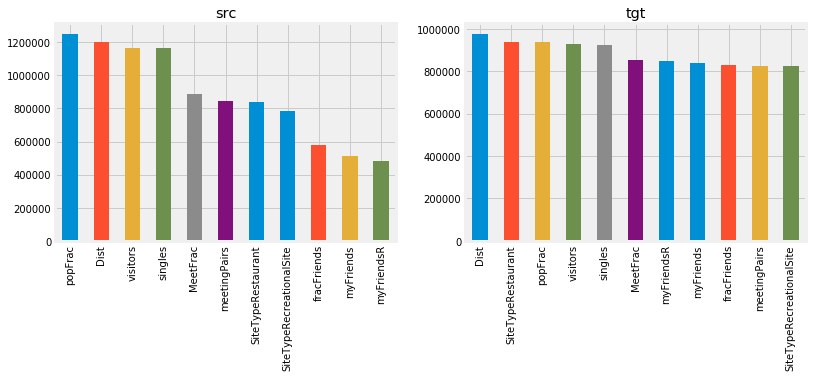

In [5]:
#print(mf.src_.value_counts())
fig=plt.figure(figsize=[12,4])
plt.subplot(121)
mf.src_.value_counts().plot(kind='bar')
plt.gca().set_title('src')
plt.subplot(122)
mf.tgt_.value_counts().plot(kind='bar')
plt.gca().set_title('tgt')

## Comment
---

> `popFrac, Dist, visitors, singles` are driving 
> a large proportion of the dynamics

In [7]:
mf_mean=mf.groupby(['src_','tgt_']).mean().reset_index()

In [43]:
def getRelationships(VAR,HIGAMMA=.7,D1=26,D2=52,D3=100,SELF=False):
    gf=mf[(mf.tgt_==VAR) & (mf.gamma>HIGAMMA) ]
    D1=26
    D2=52
    D3=100
    if not SELF:
        XX=VAR
    else:
        XX='xx'

    sf=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].src_.value_counts()
    print(sf.sort_values('gamma',ascending=False))
    #print(gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].sort_values('src_'))

    sf=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].src_.value_counts()
    print(sf.sort_values('gamma',ascending=False))
    #print(gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].sort_values('src_'))

    sf=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].groupby('src_').median()
    sf['Count']=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].src_.value_counts()
    print(sf.sort_values('gamma',ascending=False))
    #print(gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].sort_values('src_'))

    return 

In [45]:
getRelationships(VAR='SiteTypeRestaurant',HIGAMMA=.7,SELF=True)

                          delay     gamma      mass  Count
src_                                                      
SiteTypeRecreationalSite   14.5  1.000000  0.000000      2
meetingPairs                4.0  0.850912  0.401375      3
MeetFrac                    4.0  0.845244  0.395383      3
myFriendsR                  9.0  0.833220  0.241071     26
SiteTypeRestaurant          4.0  0.784864  0.337500     81
visitors                    5.0  0.753372  0.293197     47
myFriends                   5.0  0.748726  0.300000     19
singles                     5.0  0.741536  0.293478     43
popFrac                     4.5  0.731123  0.271652     24
fracFriends                 4.0  0.724641  0.290041     13
Dist                        5.0  0.715525  0.232759     23
                          delay     gamma      mass  Count
src_                                                      
SiteTypeRecreationalSite   46.0  1.000000  0.000000      1
meetingPairs               48.0  1.000000  0.000000     

In [46]:
getRelationships(VAR='SiteTypeRecreationalSite',HIGAMMA=.7,SELF=True)

                          delay     gamma      mass  Count
src_                                                      
Dist                         11  1.000000  0.000000      2
SiteTypeRecreationalSite      2  1.000000  0.000000      7
meetingPairs                  5  1.000000  0.000000      4
myFriends                     9  1.000000  0.000000      1
myFriendsR                    9  1.000000  0.000000     56
MeetFrac                      2  0.854023  0.014204      3
                          delay     gamma      mass  Count
src_                                                      
SiteTypeRecreationalSite   49.0  1.000000  0.000000      5
meetingPairs               45.0  1.000000  0.000000      8
myFriendsR                 45.0  1.000000  0.000000      5
fracFriends                34.0  0.985003  0.046113      1
MeetFrac                   32.5  0.860180  0.005268      2
myFriends                  43.0  0.772513  0.000000      1
                          delay     gamma      mass  Cou

In [41]:
HIGAMMA=.7
VAR='SiteTypeRestaurant'
gf=mf[(mf.tgt_==VAR) & (mf.gamma>HIGAMMA) ]
D1=26
D2=52
D3=100
XX=VAR

#mf_mean[mf_mean.tgt_==VAR]

sf=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].groupby('src_').median()
sf['Count']=gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].src_.value_counts()
print(sf.sort_values('gamma',ascending=False))
#print(gf[(gf.delay.between(0,D1)) & ~(gf.src_==XX)].sort_values('src_'))

sf=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].groupby('src_').median()
sf['Count']=gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].src_.value_counts()
print(sf.sort_values('gamma',ascending=False))
#print(gf[(gf.delay.between(D1+1,D2)) & ~(gf.src_==XX)].sort_values('src_'))

sf=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].groupby('src_').median()
sf['Count']=gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].src_.value_counts()
print(sf.sort_values('gamma',ascending=False))
#print(gf[(gf.delay.between(D2+1,D3)) & ~(gf.src_==XX)].sort_values('src_'))

                          delay     gamma      mass  Count
src_                                                      
SiteTypeRecreationalSite   14.5  1.000000  0.000000      2
meetingPairs                4.0  0.850912  0.401375      3
MeetFrac                    4.0  0.845244  0.395383      3
myFriendsR                  9.0  0.833220  0.241071     26
visitors                    5.0  0.753372  0.293197     47
myFriends                   5.0  0.748726  0.300000     19
singles                     5.0  0.741536  0.293478     43
popFrac                     4.5  0.731123  0.271652     24
fracFriends                 4.0  0.724641  0.290041     13
Dist                        5.0  0.715525  0.232759     23
                          delay     gamma  mass  Count
src_                                                  
SiteTypeRecreationalSite   46.0  1.000000  0.00      1
meetingPairs               48.0  1.000000  0.00      1
myFriends                  46.0  1.000000  0.00      1
myFriendsR       

In [22]:
mf_=mf[(mf.tgt_=='Dist') & (mf.src_=='Dist') ].sample(2000)

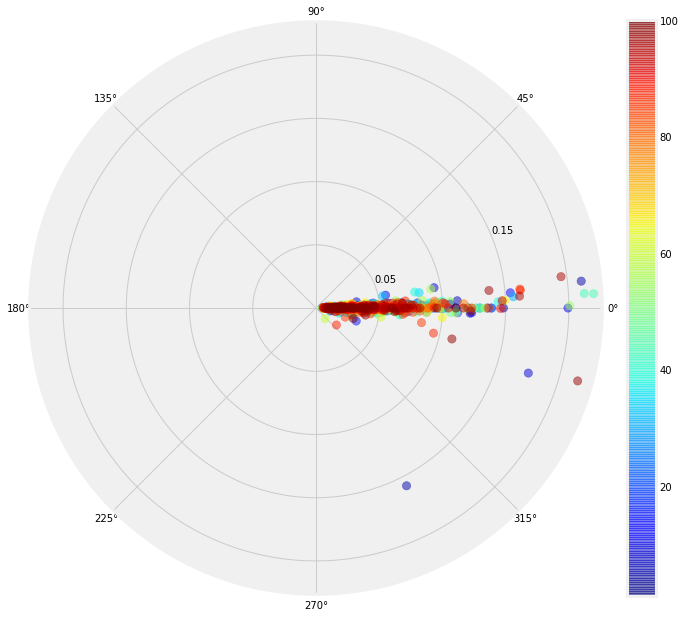

In [23]:
PREF=''
df=mf_
df['theta']=np.arccos(df.mass)*2 - (np.pi)
df=df[['gamma','theta','delay']]
df=df[df.delay.between(1,800)]
df=df.sort_values('delay')

fig=plt.figure(figsize=[10,25])
ax = plt.subplot(111, projection='polar')
sf=plt.scatter(1*df.theta.values,df.gamma.values,c=df.delay.values,s=70,cmap='jet',alpha=.5)
plt.colorbar(sf, fraction=0.046, pad=0.04)
for index, label in enumerate(plt.gca().yaxis.get_ticklabels()):
    if index % 2 != 0:
        label.set_visible(False)
        
plt.savefig(PREF+'polar.png',dpi=300,bbox_inches=0,pad=0,transparent=True)

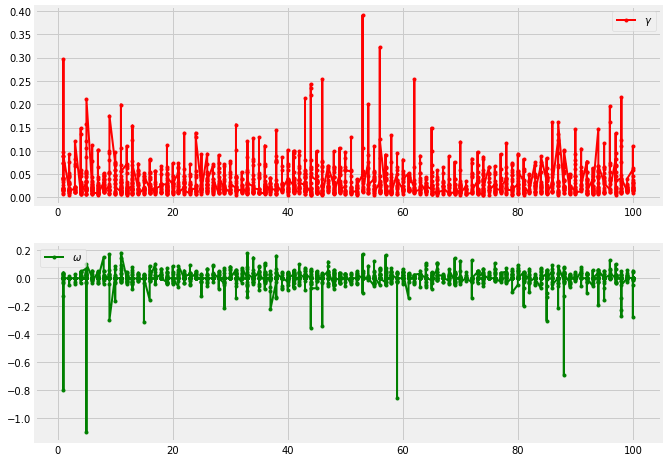

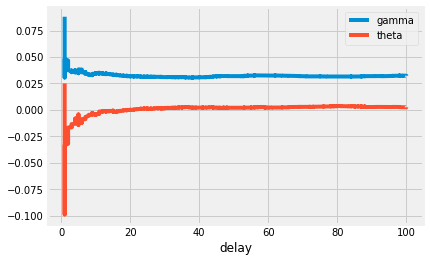

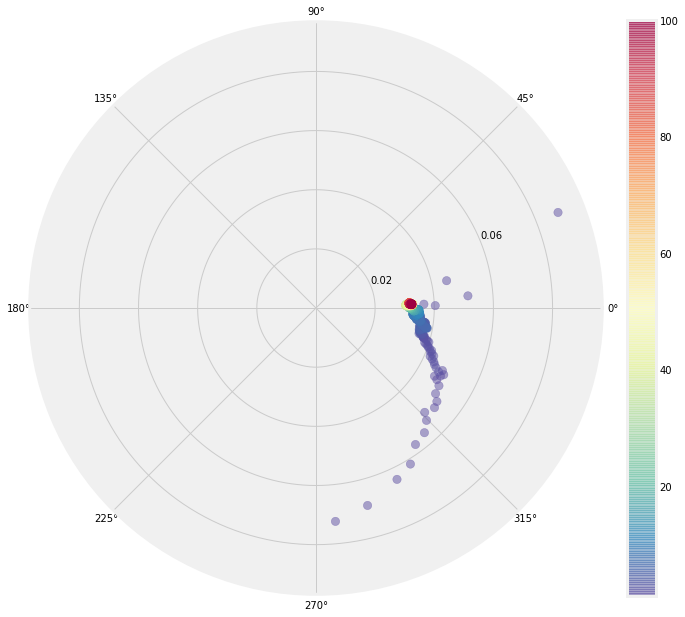

In [25]:
fig=plt.figure(figsize=[10,8])
plt.subplot(211)
plt.plot(df.delay.values,df.gamma.values,'-r.',label='$\gamma$',lw=2)
plt.legend()
plt.subplot(212)
plt.plot(df.delay.values,df.theta.values,'-g.',label='$\omega$',lw=2)
plt.legend()
plt.savefig(PREF+'gammaomega.png',dpi=300,bbox_inches=0,pad=0,transparent=True)

df1=df.set_index('delay').ewm(alpha=.0001).mean()
df.set_index('delay').ewm(alpha=.0001).mean().plot()
plt.savefig(PREF+'gammaomega_.png',dpi=300,bbox_inches=0,pad=0,transparent=True)       


fig=plt.figure(figsize=[10,25])
ax = plt.subplot(111, projection='polar')
sf=plt.scatter(15*df1.theta.values**1,df1.gamma.values,c=df1.index.values,s=70,cmap='Spectral_r',alpha=.5)
plt.colorbar(sf, fraction=0.046, pad=0.04)
ax.set_ylim(0,1.1*df1.gamma.max())
for index, label in enumerate(plt.gca().yaxis.get_ticklabels()):
    if index % 2 != 0:
        label.set_visible(False)
plt.savefig(PREF+'polar_.png',dpi=300,bbox_inches=0,pad=0,transparent=True)
